## 实验：仿射变换 (Affine Transformation)

### 实验概要

到目前为止，我们已经讨论了沿着一个方向移动图像。接下来，让我们讨论以给定角度围绕指定点旋转图像。

#### 图像旋转

`图像旋转`，顾名思义，就是将图像以指定的角度围绕一个点旋转。

**最常见的表示法是，如果是逆时针方向，则将角度定义为正，如果是顺时针方向，则将角度定义为负。**

让我们考虑如下图所示的情况: `w` 和 `h` 分别表示图像的高度和jfif宽度。图像以逆时针方向绕原点(0,0)旋转一个角度，`alpha(α)`：

<img src="./img/7.jfif" width="80%">

我们可以很清楚地注意到：即使在旋转之后，点到原点的距离保持不变。我们在推导旋转矩阵的时候会用到这个点。我们可以把整个问题分为两个部分:

- **求旋转矩阵**
- **求旋转后图像的尺寸**

##### 求旋转矩阵

假设有一个点：`P(x,y)`，它在绕原点 `O(0,0)` 旋转 `β` 后，被转换成 `P'(x'，y')`，另外，点 `P` 到原点 `O` 的距离为 `r`:

<img src="./img/8.jfif" width="80%">

我们利用距离公式得到了 `P` 和 `O` 之间的距离：

$$
r=\sqrt{(x-0)^{2}+(y-0)^{2}}=\sqrt{x^{2}+y^{2}}
$$

因为我们知道这个距离会保持不变，即使在旋转之后，我们可以写出如下方程：

$$
r=\sqrt{x^{2}+y^{2}}=\sqrt{x^{\prime 2}+y^{\prime 2}}
$$

假设 `P(x,y)` 点与 `X` 轴成一个角`α`。在这里，公式如下：

>- x = r cos(α)
>- y = r sin(α)

同理，`P'(x'，y')` 点将与 `X` 轴形成一个角，`α + β`。因此，公式如下：

>- x' = r cos(α+β)
>- y' = r sin(α+β)

接下来，我们将使用下面的三角恒等式：

>- cos(α+β) = cosαcosβ – sinαsinβ

因此，我们可以将 `x'` 的方程化简为：

$$
\begin{aligned}
x^{\prime} &=r(\cos \alpha \cos \beta-\sin \alpha \sin \beta) \\
\Rightarrow x^{\prime} &=r(\cos \alpha \cos \beta)-r(\sin \alpha \sin \beta) \\
\Rightarrow x^{\prime} &=(r \cos \alpha) \cos \beta-(r \sin \alpha) \sin \beta \\
& \Rightarrow x^{\prime}=(x) \cos \beta-(y) \sin \beta \\
& \Rightarrow x^{\prime}=x \cos \beta-y \sin \beta
\end{aligned}
$$

同理，我们用下面的三角恒等式来简化 `y'` 的方程：

>- sin(α+β) = sinαcosβ – cosαsinβ

利用上式，我们可以将 `y'` 简化为:

$$
\begin{aligned}
y^{\prime} &=r(\sin \alpha \cos \beta+\cos \alpha \sin \beta) \\
\Rightarrow y^{\prime} &=r(\sin \alpha \cos \beta)+r(\cos \alpha \sin \beta) \\
\Rightarrow y^{\prime} &=(r \sin \alpha) \cos \beta+(r \cos \alpha) \sin \beta \\
& \Rightarrow y^{\prime}=(y) \cos \beta+(x) \sin \beta \\
& \Rightarrow y^{\prime}=y \cos \beta+x \sin \beta \\
& \Rightarrow y^{\prime}=x \sin \beta+y \cos \beta
\end{aligned}
$$

我们现在可以用下面的矩阵方程来表示 `x'` 和 `y'`：

$$
\left[\begin{array}{l}
x^{\prime} \\
y^{\prime}
\end{array}\right]=\left[\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}\right]\left[\begin{array}{l}
x \\
y
\end{array}\right]
$$

现在，我们已经得到了前面的方程，我们可以把任何点变换成一个新的点，只要它旋转一个给定的角度。同样的方程可以应用于图像中的每个像素，从而得到旋转后的图像。但是，即使图像被旋转了，它仍然在一个矩形内。这意味着新图像的尺寸可以改变，而在平移中，输出图像和输入图像的尺寸保持不变。

我们来看看如何求出图像的尺寸。

##### 求旋转后图像的尺寸

这里我们将考虑两种情况。

- 第一种情况是我们保持输出图像的尺寸与输入图像的尺寸相同。
- 第二种情况是我们修改输出图像的尺寸。

让我们通过下面的图表来理解它们之间的区别。

将图像以逆时针方向围绕图像中心旋转一个角度 `ϴ` ——

- 左半部分显示的是即使是在旋转之后，图像的尺寸保持不变的情况
- 而在右半部分，我们缩放尺寸以覆盖整个旋转后的图像。

您可以看到两种情况下得到的结果的差异。下图中 `L` 和 `H` 为原始图像的尺寸，`L'` 和 `H'` 为旋转后的尺寸。

<img src="./img/11.jfif" width="80%">

上图中，旋转后图像的大小，取决于图像的尺寸是保持不变还是在旋转时进行了修改。对于我们想要保持图像大小与初始图像大小相同的情况，我们只需要剔除额外的区域。如果我们不想保持相同的尺寸，需要学习如何获得旋转后的图像的尺寸。

<img src="./img/12.jfif" width="80%">

在上图中，原始图像 `ABCD` 沿着图像中心旋转了一个角度 `θ`，以形成新的图像`A'B'C'D'`。

参考上图，我们可以写出如下公式：

>- A'Q = L cosθ
>- A'P = H sinθ

因此，我们可以用 `L` 和 `H` 得到 `L'`，如下所示。注意，`L'` 是指旋转后图像的大小。

>L' = PQ = PA' + A'Q = H sinθ + L cosθ

同理，我们可以写出以下方程：

>- PD' = H cosθ
>- D'S = L sinθ

因此，我们可以用 `L` 和 `H` 得到 `H'`，如下：

>H' = PS = PD' + D'S = L sinθ + H cosθ

这里有一个棘手的部分。我们知道 `cos` 和 `sin` 的值也可以是负的，但是旋转后的图像的大小不能小于输入图像的大小。因此，我们将使用正弦和余弦的绝对值，对 `L'` 和 `H'` 的方程进行修改：

>- L' = L|cosθ| + H |sinθ|
>- H' = L|sinθ| + H |cosθ|

我们可以将这些值四舍五入，以获得旋转后图像的新宽度和高度的整数值。

##### cv2.getRotationMatrix2D 函数

现在你可能想问一个问题。每次我们想要旋转一个图像时，我们必须做所有这些计算吗？幸运的是，答案是否定的。OpenCV 有一个函数，如果我们想要按给定角度旋转图像，我们可以使用它。它还提供了缩放图像的选项。`cv2.getRotationMatrix2D` 函数，它生成旋转矩阵，可用于旋转图像。这个函数有三个参数：

- 我们想要旋转图像的点。通常，选择图像的中心或左下角作为点。
- 我们想要旋转图像的角度。
- 我们想要改变图像尺寸的因素。这是一个可选参数，可用于缩小或放大图像。在前面的例子中，它是 `1` ，因为我们没有调整图像的大小。

在后面的实验中，你会通过实际操作，详细了解这几个参数的应用方式。

#### 图像缩放

加入你正在训练一个深度学习模型，或者使用它来进行一些预测，例如：目标检测、图像分类等等。大多数深度学习模型（用于图像）都要求输入图像的大小是固定的。在这种情况下，我们调整图像的大小以匹配这些尺寸。我们修改图像的尺寸，调整图像大小是一个非常简单的概念，这一概念几乎在每个计算机视觉领域都有应用，包括：图像分类、人脸检测、人脸识别等。

图像可以通过两种方式调整大小：

- 假设我们的初始尺寸为 `W×H`，其中 `W` 和 `H` 分别代表宽度和高度。如果我们想要加倍的大小(尺寸)的图像，我们可以调整或缩放图像到 `2W×2H`。类似地，如果我们想将图像的大小(尺寸)减少一半，那么我们可以调整或缩放图像到 `W/2×H/2`。因为我们只是想缩放图像，我们可以在调整大小时传递缩放因子(长度和宽度)，图像输出尺寸可以根据这些比例因子计算出来。
- 同时，我们也可能想要将图像的大小调整为一个固定的尺寸，比如 `420×360` 像素。在这种情况下，缩放将不起作用，因为您不能确定初始维度是固定维度的倍数(或因数)。这要求我们在调整大小时直接传递图像的新尺寸。

让我们通过一个例子来理解 ——

![](./img/13.jfif)

上图显示了我们想要调整大小的图像和像素值。目前，它的尺寸是 `5×5`。假设我们想要翻倍。这将导致以下输出。但是，我们想要填充像素值。

![](./img/14.jfif)

让我们看看我们有哪些不同的选择。我们可以复制像素。这将给我们如下图所示的结果：

![](./img/15.jfif)

如果我们去掉前面图像中的像素值（方格里面的数字），我们将得到如下图所示的图像。将其与原始图像进行比较。注意它看起来和原始图像是多么的相似:

![](./img/16.jfif)

类似地，如果我们想要将图像缩小一半，可以减少一些像素。你会注意到，在调整大小时，我们复制了像素。我们还可以使用其他一些技巧。譬如：我们可以使用插值，即根据相邻像素的像素值找出新的像素值，而不是直接复制它们。这给了颜色一个很好的平滑过渡。下图显示了如果我们使用不同的插值，结果是如何变化的。从下图中，我们可以看到，当我们从左到右执行时，新创建的像素值的计算方式是不同的。在前三幅图像中，像素是直接从相邻像素复制的，而在后一幅图像中，像素值依赖于所有相邻像素(左、右、上、下)，也依赖于对角线相邻的像素:

<img src="./img/17.jfif" width="80%">

你暂时不需要关注所有可用的插值，我们常用的插值调整大小主要有 ——

- 如果我们要缩小图像，我们将使用双线性插值。通过 OpenCV 中的 `cv2.INTER_AREA` 命令表示。
- 如果我们要放大图像，我们将使用线性插值（`cv2.INTER_LINEAR`）或者三次插值(`cv2.INTER_CUBIC`)实现。

下面，我们进一步了解 OpenCV 中用于调整图像大小的 `cv2.resize` 函数。

##### cv2.resize 函数

`cv2.resize(src,dsize,fx,fy,interpolation)`

- **`src`：** 指定需要调整大小的目标图像。
- **`dsize`：** 输出图像的大小(宽度、高度)。在知道输出图像的尺寸时使用。如果我们只是缩放图像，我们将设置为 `None`。
- **`fx` 与 `fy`：** 比例因子。在想要缩放图像时使用，如果我们已经知道输出图像的尺寸，就跳过这些参数。如果我们想在 `x` 方向缩放 `5`，在 `y` 方向缩放 `3`，它们被指定为 `fx = 5, fy = 3`。
- **`interpolation`：** 指定我们想要使用的插值。如果我们想用线性插值的话，设置 `interpolation=cv2.INTER_LINEAR` ；如果是其他插值方法，还可以使用 `cv2.INTER_AREA` 或者 `cv2.INTER_CUBIC` 等等。

#### 仿射变换（Affine Transformation）函数 cv2.warpAffine

仿射变换是计算机视觉中最重要的几何变换之一。原因是仿射变换可以将平移、旋转和调整大小的效果组合到一个变换中。OpenCV 中的仿射变换使用 `2×3` 矩阵，然后使用 `cv2.warpAffine` 函数应用矩阵。这个函数有三个参数：

`cv2.warpAffine(src,M,dsize)`

- **`src`：** 是我们希望对其应用转换的图像。
- **`M`：** 是转换矩阵。
- **`dsize`：** 是输出图像的形状。使用的顺序是（宽度，高度）或（列数，行数）。

为了生成用于仿射变换的变换矩阵，我们选择输入图像上的任意三个非共线点以及输出图像上的相应点，其中：

- (in1x, in1y)，(in2x, in2y)，(in3x, in3y) 为输入图像
- (out1x, out1y)，(out2x, out2y)，(out3x, out3y) 为输出图像。

然后，我们可以使用下面的代码来生成变换矩阵。我们可以使用下面的代码创建一个 NumPy 数组来存储这些点:

`ptsInput = np.float32([[in1x, in1y],[in2x, in2y],[in3x, in3y]])`

另外，我们也可以使用下面的代码:

`ptsOutput = np.float32([[out1x, out1y],[out2x, out2y],[out3x, out3y]])`

接下来，我们将把这两个 NumPy 数组传递给 `cv2.getAffineTransform` 函数，如下所示:

`M = cv2.getAffineTransform(ptsInput, ptsOutput)`

我们已经了解了如何生成变换矩阵，让我们看看如何应用它。

`outputImage = cv2.warpAffine(inputImage, M, (outputImageWidth, outputImageHeight))`

我们已经讨论了仿射变换以及如何应用它，让我们把这些知识应用到下面的实验中。

### 实验目标

本实验中，我们将使用前面讨论过的 OpenCV 函数来平移、旋转和调整图像大小。我们将在实验中使用下面的图像。

<img src="./img/18.jfif" width="50%">

### 1. 导入依赖库

In [3]:
# 导入模块
import cv2                       # 导入OpenCV
import numpy as np               # 导入NumPy
import matplotlib.pyplot as plt  # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline                

### 2. 加载图像

指定需要执行仿射变换操作的目标图像路径。

您也可以上传自己的图像，需要注意的是确保加载图像路径有效，95% 以上的程序报错,除了缺少安装依赖库以外，大部分就跟数据路径不正确有关。这里使用 cv2.imread() 加载图像的路径，往往使用的都是相对路径，应该确保指定了正确的图片文件所在的路径。

In [11]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab2/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

img = cv2.imread("./data/drip.jpg") # 读取图像文件

输出信息如下。X 轴和 Y 轴分别为图像的宽度和高度:

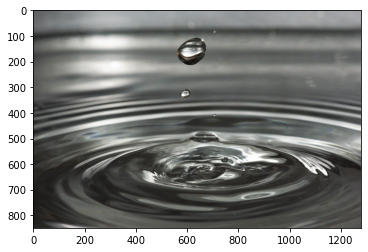

(849, 1280, 3)


In [13]:
plt.imshow(img[:,:,::-1]) # 将图像从BGR转换为RGB
plt.show()                # 显示图像
print(img.shape)

### 3. 将图像转换为灰度

In [14]:
# 将图像转换为灰度，便于操作
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
print(img.shape)

(849, 1280)


### 4. 保存图像的高度与宽度

In [7]:
height,width = img.shape # 保存图像的高度与宽度

### 5. 平移图像

将图像向 `右` 移动 `100` 像素，向 `下` 移动 `100` 像素。

注意：OpenCV 的坐标原点 `(0,0)` 为图像左上角，因此，向下为 Y 轴正向平移，向右为 X 轴正向评议。

In [6]:
# 定义X/Y轴的平移距离
tx = 100                                    # 定义X轴平移量
ty = 100                                    # 定义Y轴平移量

通过 `np.float32` 函数获得平移变换矩阵 `M`，通过仿射变换函数 `cv2.warpAffine` 将变换矩阵 `M` 应用到目标图像 `img` 上面。

**这里需要稍加注意的是我们输出的图像形状是高度（height）后宽度（width），而在仿射变换函数 `cv2.warpAffine` 中的 `dsize` 参数是先宽度（width）后高度（height）。**

In [7]:
# 定义转换矩阵M
M = np.float32([[1,0,tx],[0,1,ty]])         
# 对原始图像img执行变换矩阵M的转换，大小保持不变，输出图像dst
dst = cv2.warpAffine(img,M,(width,height))  

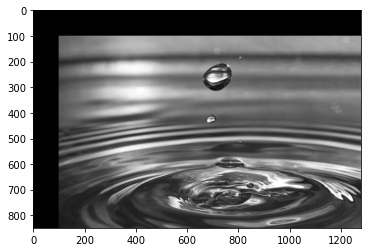

In [8]:
plt.imshow(dst,cmap="gray")                 # 使用灰度显示图像
plt.show()                                  # 显示图像

### 6. 旋转图像

接下来，围绕图像的中心逆时针旋转 `45` 度，并将其放大 `2` 倍。

首先，指定 `cv2.getRotationMatrix2D` 函数的三个参数：

- **`center`**：图片的旋转中心。一般使用图像的中心，即取长和宽的一半 `(width//2, height//2)`。
- **`angle`**：旋转角度。逆时针为正角度，顺时针为负角度。
- **`scale`**: 缩放因子。图像旋转时的尺寸是否缩放。

之后，通过将以上三个参数代入 `cv2.getRotationMatrix2D` 获得变换矩阵 `M`。

最后，使用仿射变换函数 `cv2.warpAffine` 将变换矩阵 `M` 应用到目标图像 `img` 上面。

**这里需要稍加注意的是我们输出的图像形状是高度（height）后宽度（width），而在仿射变换函数 `cv2.warpAffine` 中的 `dsize` 参数是先宽度（width）后高度（height）。**

In [9]:
# 旋转图像
# 定义以图像中心作为旋转中心
center = (width//2, height//2)                  
# 定义旋转角度为45度，即逆时针转45度
angle = 45                                       
# 定义缩放因子为2，将图像放大2倍
scale = 2                                        
# 通过cv2.getRotationMatrix2D函数获得变换矩阵M
M = cv2.getRotationMatrix2D(center,angle,scale)  
# 通过cv2.warpAffine函数将变换矩阵M应用到图像img上面，获得新的图像dst
dst = cv2.warpAffine(img,M,(width,height))       

输出信息如下，X 轴和 Y 轴分别为图像的宽度和高度:

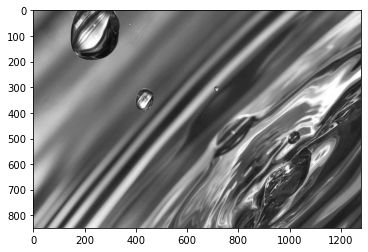

In [10]:
# 使用灰度显示图像
plt.imshow(dst,cmap="gray")                
# 显示图像
plt.show()                                 

### 7. 放大图像

最后，使用 `cv2.resize` 函数图像大小增加一倍。

In [11]:
# 调整图像尺寸
# 首先输出当前图像尺寸（宽、高）
print("Width of image = {}, Height of image = {}".format(width, height)) 

# 使用线性插值法将图像放大两倍
dst = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR) 
# 保存新图像的高度和宽度
height, width = dst.shape                                                
# 输出放大后的图像尺寸（宽、高）
print("Width of image = {}, Height of image = {}".format(width, height)) 

Width of image = 1280, Height of image = 849
Width of image = 2560, Height of image = 1698


显示放大后的图像，**注意坐标轴的值，确认图像被放大了两倍**

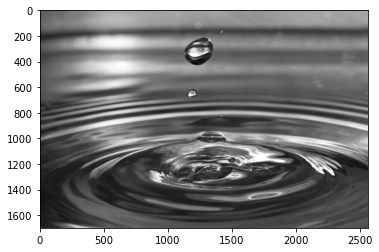

In [12]:
plt.imshow(dst,cmap="gray")                # 使用灰度显示图像
plt.show()                                 # 显示图像

### 实验小结

在本实验中，我们学习了：

- 平移变换矩阵函数 `np.float32`
- 旋转矩阵生成函数 `cv2.getRotationMatrix2D`
- 仿射变换函数 `cv2.warpAffine`
- 图像缩放函数 `cv2.resize`

以及如何使用这些 OpenCV 函数来平移、旋转和调整图像大小。